In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
#chaning the columns name to Month and Sale

In [8]:
df.columns = ["Month","Sales"]

In [9]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
df.drop(105,axis = 0,inplace = True)

In [11]:
df.drop(106,axis = 0,inplace = True)

In [12]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [14]:
#converting the date columns from month to to_datetime

In [15]:
df["Month"] = pd.to_datetime(df["Month"])

In [16]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
#setting the date as a index

In [18]:
df.set_index("Month",inplace = True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

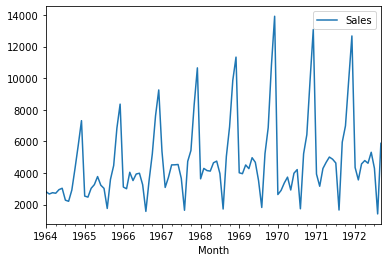

In [21]:
df.plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adfuller_result(sales):
    result = adfuller(sales)
    label = ["ADF-Tet-statistic",'p-value','#lags used','number of obs']
    for value,label in zip(result,label):
        print(label+ ':'+str(value))
    if result[1]<0.05:
        print("Stationary")
    else:
        print("non stationary")

In [41]:
adfuller_result(df["Sales First Difference"].dropna())

ADF-Tet-statistic:-7.189896448051006
p-value:2.51962044738698e-10
#lags used:11
number of obs:92
Stationary


In [33]:
#differmcing in order to make it as stationary and also seeing for stationary data

In [34]:
df["Sales First Difference"] = df["Sales"] - df["Sales"].shift(1)

In [37]:
df["Sales seasonal difference"] = df["Sales"] - df["Sales"].shift(12)

In [38]:
df.head(14)

,Sales,Sales First Difference,Sales seasonal difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


<AxesSubplot:xlabel='Month'>

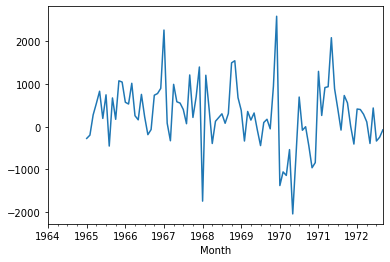

In [42]:
df["Sales seasonal difference"].plot()

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

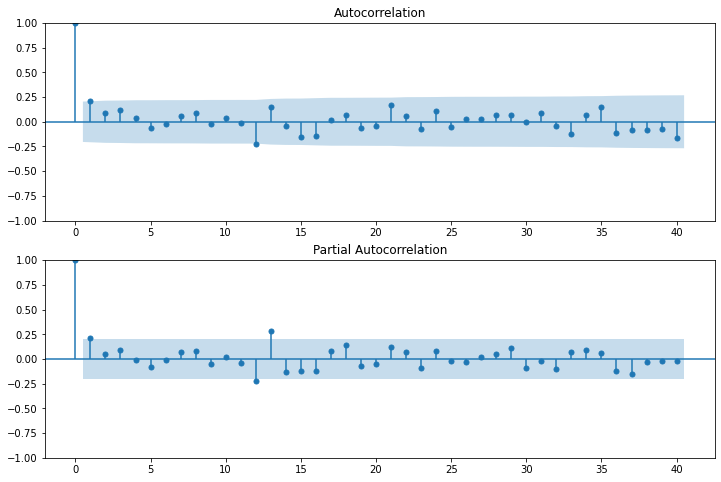

In [47]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df["Sales seasonal difference"].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df["Sales seasonal difference"].iloc[13:],lags = 40,ax = ax2)

In [48]:
#since it is a stationary data


In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model= SARIMAX(df["Sales"],order = (1,1,1),seasonal_order = (1,1,1,12))

D:\Anconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
df.shape

(105, 4)

In [61]:
rs = model.fit()

In [62]:
df["Predict"] = rs.predict(start = 90,end = 103, dynamic = True)

<AxesSubplot:xlabel='Month'>

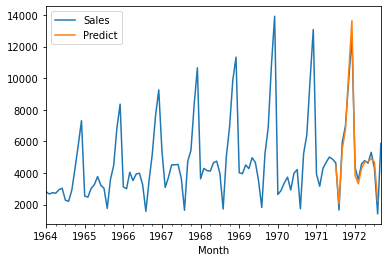

In [63]:
df[["Sales","Predict"]].plot()

In [91]:
from pandas.tseries.offsets import DateOffset 
f = [df.index[-1]+DateOffset(months = x) for x in range(0,24)]

In [92]:
future_dataset_df = pd.DataFrame(index = f[1:],columns = df.columns)
future_dataset_df

,Sales,Sales First Difference,Sales seasonal difference,Predict
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [70]:
df.tail()

,Sales,Sales First Difference,Sales seasonal difference,Predict
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,4717.510399
1972-06-01,5312.0,694.0,438.0,4906.403735
1972-07-01,4298.0,-1014.0,-335.0,4685.436016
1972-08-01,1413.0,-2885.0,-246.0,2232.408282
1972-09-01,5877.0,4464.0,-74.0,NaN


In [94]:
future_d = pd.concat([df,future_dataset_df])

In [95]:
future_d

,Sales,Sales First Difference,Sales seasonal difference,Predict
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [98]:
future_d["forecast"] = rs.predict(start = 104,end = 120,dynamic = True)

<AxesSubplot:>

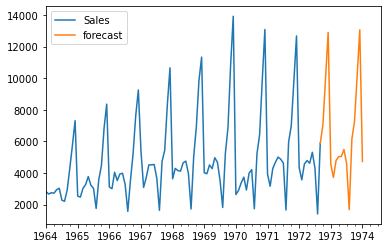

In [99]:
future_d[["Sales","forecast"]].plot()

In [96]:
future_d.columns

Index(['Sales', 'Sales First Difference', 'Sales seasonal difference',
       'Predict'],
      dtype='object')